# Laboratorio N°1 Metodos de Optimización

##### Nicolás Romero Flores

#### Se importan las bibliotecas a ocupar

In [256]:
using JuMP
using Cbc

## Problema 1: Selección de portafolio

Selección de portafolio.Un consultor en finanzas requiere elegir para uno de sus clientes un conjunto de acciones en  las cuales invertir. El cliente desea invertir €100.000 en 6 diferentes acciones. El consultor estima el retorno sobre la inversión (ROI) que el cliente puede obtener en un período de seis meses. La tabla nro. 1 muestra para cada acción, su país de origen, la categoría (T: tecnológicas, N: no tecnológicas) y el ROI esperado. 

| Acción  | Origen      | Categoría | ROI  |
|---------|-------------|-----------|------|
| 1       | Japón       | T         | 5.3% |
| 2       | Reino Unido | T         | 6.2% |
| 3       | Francia     | T         | 5.1% |
| 4       | USA         | N         | 4.9% |
| 5       | Alemania    | N         | 6.5% |
| 6       | Francia     | N         | 3.4% |

El cliente especifica ciertas restricciones. Pide invertir al menos 5.000 € y como máximo € 40,000  en  cada  una  de  las  acciones.  Además,  desea  invertir  al  menos la mitad de su capital en acciones europeas y como mucho 30% en acciones tecnológicas. ¿Cómo debe dividirse el capital entre las acciones para obtener el mayor ROI?

### Modelo

#### Variables de decision
La cantidad de dinero a invertir en cada accion (6 acciones).

In [257]:
model_p1 = Model(with_optimizer(Cbc.Optimizer))
@variable(model_p1, x[1:6] >= 0)

6-element Array{VariableRef,1}:
 x[1]
 x[2]
 x[3]
 x[4]
 x[5]
 x[6]

#### Funcion objetivo

Se debe maximizar la sumatoria de las cantidades de dinero invertido cada una multiplicada por su ROI.

In [258]:
@objective(model_p1, Max, (5.3/100)x[1] + (6.2/100)x[2] + (5.1/100)x[3] + (4.9/100)x[4] + (6.5/100)x[5] + (3.4/100)x[6])

0.053 x[1] + 0.062000000000000006 x[2] + 0.051 x[3] + 0.049 x[4] + 0.065 x[5] + 0.034 x[6]

#### Restricciones

Se restringe la cantidad minima (\\$5000) y maxima(\\$40000) a invertir para cada accion. Luego se aplican las restricciones por pais y por tipo de accion.

In [259]:
for i = 1:6
    @constraint(model_p1, 5000 <= x[i] <= 40000)
end

@constraint(model_p1, x[1] + x[2] + x[3] <= 30000)
@constraint(model_p1, x[1] + x[3] + x[5] + x[6] >= 50000)
@constraint(model_p1, x[1] + x[2] + x[3] + x[4] + x[5] + x[6] <= 100000)

x[1] + x[2] + x[3] + x[4] + x[5] + x[6] ≤ 100000.0

#### Resultados

Finalmente se obtiene que el valor optimo es \\$5755, lo que corresponde a la ganancia de obtenida de todas las inversiones.

In [260]:
optimize!(model_p1)
JuMP.objective_value(model_p1)

Welcome to the CBC MILP Solver 
Version: 2.9.9 
Build Date: Dec 31 2018 

command line - Cbc_C_Interface -solve -quit (default strategy 1)
Presolve 3 (-6) rows, 6 (0) columns and 13 (-6) elements
0  Obj 1570 Primal inf 30000 (1) Dual inf 0.313994 (6)
3  Obj 5755
Optimal - objective value 5755
After Postsolve, objective 5755, infeasibilities - dual 0 (0), primal 0 (0)
Optimal objective 5755 - 3 iterations time 0.002, Presolve 0.00
Total time (CPU seconds):       0.00   (Wallclock seconds):       0.00



5755.0

In [261]:
JuMP.value.(x)

6-element Array{Float64,1}:
  5000.0
 20000.0
  5000.0
 25000.0
 40000.0
  5000.0

## Problema 2: Producción de aleaciones

Una empresa siderúrgica ha recibido un pedido de 500 toneladas de acero destinado a la construcción naval. El acero,  debe cumplir con los siguientes requisitos porcentuales en su composición.

| Elemento Quimico | Minimo Porcentual (%) | Maximo Porcentual (%) |
|------------------|-----------------------|-----------------------|
| Carbón (C)       | 2                     | 3                     |
| Cobre (Cu)       | 0.4                   | 0.6                   |
| Manganeso (Mn)   | 1.2                   | 1.65                  |

La empresa cuenta con siete materias primas diferentes en stock que pueden ser utilizadas para la producción del acero. En tabla se enumeran los porcentajes, las cantidades disponibles y los precios de todas las materias primas.

| Materia  prima | C % | Cu % | Mn % | Disponibilidad  en t | Costo en €/t |
|----------------|-----|------|------|----------------------|--------------|
| Hierro 1       | 2.5 | 0    | 1.3  | 400                  | 200          |
| Hierro 2       | 3   | 0    | 0.8  | 300                  | 250          |
| Hierro 3       | 0   | 0.3  | 0    | 600                  | 150          |
| Cobre 1        | 0   | 90   | 0    | 500                  | 220          |
| Cobre 2        | 0   | 96   | 4    | 200                  | 240          |
| Aluminio 1     | 0   | 0.4  | 1.2  | 300                  | 200          |
| Aluminio 2     | 0   | 0.6  | 0    | 250                  | 165          |

El objetivo es determinar la composición de la aleación de acero que minimice el costo de producción.

### Modelo

#### Variables de decision

Las variables de decision corresponden a las cantidades de toneladas de cada materia prima.

In [262]:
model_p2 = Model(with_optimizer(Cbc.Optimizer))
@variable(model_p2, x[1:7] >= 0)

7-element Array{VariableRef,1}:
 x[1]
 x[2]
 x[3]
 x[4]
 x[5]
 x[6]
 x[7]

#### Funcion objetivo

La funcion objetivo corresponde a la sumatoria de las cantidades de materia prima multiplicado por su costo por tonelada, se debe minimizar los costos.

In [263]:
@objective(model_p2, Min, 200x[1] + 250x[2] + 150x[3] + 220x[4] + 240x[5] +200x[6] + 165x[7])

200 x[1] + 250 x[2] + 150 x[3] + 220 x[4] + 240 x[5] + 200 x[6] + 165 x[7]

#### Restricciones

Primero se declaran las restricciones de porcentaje maximo y minimo que puede existir de cada materia prima en el acero (segun su composicion de elementos). Luego se declaran las restricciones de cantidad de materia prima disponible. La ultima restriccion corresponde a las 500 toneladas que se necesitan de acero.

In [264]:
@constraint(model_p2, 0.025x[1] + 0.03x[2] >= sum(0.002x[i] for i=1:7))
@constraint(model_p2, 0.003x[3] + 0.9x[4] + 0.96x[5] + 0.004x[6] + 0.006x[7] >= sum(0.004x[i] for i=1:7))
@constraint(model_p2, 0.013x[1] + 0.008x[2] + 0.04x[5] + 0.012x[6] >= sum(0.012x[i] for i=1:7))
@constraint(model_p2, 0.025x[1] + 0.03x[2] <= sum(0.03x[i] for i=1:7))
@constraint(model_p2, 0.003x[3] + 0.9x[4] + 0.96x[5] + 0.004x[6] + 0.006x[7] <= sum(0.006x[i] for i=1:7))
@constraint(model_p2, 0.013x[1] + 0.008x[2] + 0.004x[5] + 0.012x[6] <= sum(0.0165x[i] for i=1:7))

@constraint(model_p2, 0 <= x[1] <= 400)
@constraint(model_p2, 0 <= x[2] <= 300)
@constraint(model_p2, 0 <= x[3] <= 600)
@constraint(model_p2, 0 <= x[4] <= 500)
@constraint(model_p2, 0 <= x[5] <= 200)
@constraint(model_p2, 0 <= x[6] <= 300)
@constraint(model_p2, 0 <= x[7] <= 250)
@constraint(model_p2, sum(x[i] for i=1:7) == 500)

x[1] + x[2] + x[3] + x[4] + x[5] + x[6] + x[7] = 500.0

#### Resultados

Finalmente se obtiene el valor optimo de \\$98121.636, que es el costo minimo al cual se puede fabricar el pedido.

In [265]:
JuMP.optimize!(model_p2)
JuMP.objective_value(model_p2)

Welcome to the CBC MILP Solver 
Version: 2.9.9 
Build Date: Dec 31 2018 

command line - Cbc_C_Interface -solve -quit (default strategy 1)
Presolve 5 (-9) rows, 7 (0) columns and 32 (-20) elements
0  Obj 0 Primal inf 392.14478 (1)
9  Obj 98121.636
Optimal - objective value 98121.636
After Postsolve, objective 98121.636, infeasibilities - dual 0 (0), primal 0 (0)
Optimal objective 98121.63579 - 9 iterations time 0.002, Presolve 0.00
Total time (CPU seconds):       0.00   (Wallclock seconds):       0.00



98121.63579168123

In [266]:
JuMP.value.(x)

7-element Array{Float64,1}:
 400.00000000000006  
   0.0               
  39.77630199231036  
   0.0               
   2.7612722824187346
  57.462425725270826 
   0.0               

## Problema 3: Problema de planificación

Se está prospectado una mina de uranio a cielo abierto. Sobre la base de los resultados de algunas perforaciones de prueba, la mina se ha subdividido en unidades de explotación denominadas bloques. Las excavaciones se deben realizar en forma aterrazada, con el fin de permitir la circulación de los camiones. El yacimiento se extiende de este a oeste, viéndose limitada por un pueblo y por un conjunto montañoso. Considerando estas limitaciones, se han identificado 18 bloques de 10.000 toneladas distribuidos en tres niveles. Para extraer un bloque, es necesario antes extraer tres bloques del nivel inmediatamente superior, siendo estos, el bloque superior y los ubicados a la derecha y a la izquierda de este. Ejemplo: Para extraer el bloque 16, antes se deben extraer los bloques 10, 11 y 12.

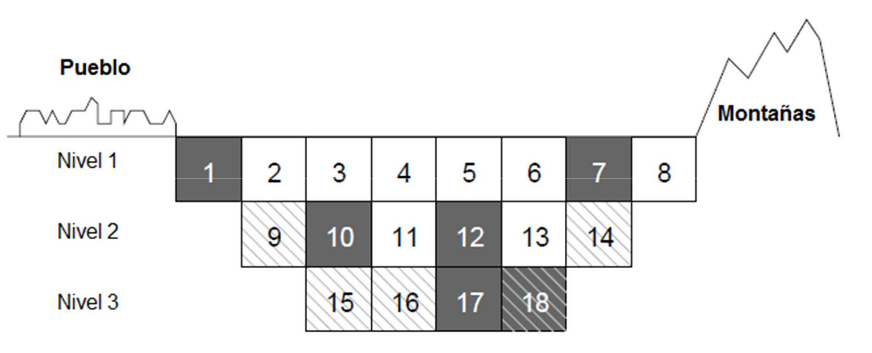

Extraer un bloque del nivel 1 tiene un costo de € 100 por tonelada, para un bloque del nivel 2 el costo es de € 200 por tonelada y de € 300 por tonelada para un bloque del nivel 3, con excepción de los bloques achurados, los cuales debido a su riqueza en cuarzo, presentan una roca más dura, elevando su costo de extracción a € 1000 por tonelada. Los únicos bloques que contienen uranio son los que aparecen en un gris (1, 7, 10, 12, 17 y 18), siendo sus valores de mercado de 200, 300, 500, 200, 1000 y € 1200 por tonelada, respectivamente. El bloque 18, aunque rico en mineral, es de composición dura, tal como los otros bloques achurados. ¿Qué bloques se debiesen extraer para maximizar el beneficio total?

### Modelo

#### Variables de decision

Las variables de decision son 18 variables binarias que indican si se extrajo cada bloque o no.

In [267]:
model_p3 = Model(with_optimizer(Cbc.Optimizer))
@variable(model_p3, x[1:18], binary=true)

18-element Array{VariableRef,1}:
 x[1] 
 x[2] 
 x[3] 
 x[4] 
 x[5] 
 x[6] 
 x[7] 
 x[8] 
 x[9] 
 x[10]
 x[11]
 x[12]
 x[13]
 x[14]
 x[15]
 x[16]
 x[17]
 x[18]

#### Funcion objetivo

La funcion objetivo es la sumatoria de cada variable por su beneficio neto (ganancia - costo). Se debe maximizar el beneficio.

In [268]:
@objective(model_p3, Max, 10000((200 - 100)x[1] + (-100)x[2] + (-100)x[3] + (-100)x[4] + (-100)x[5] + 
                        (-100)x[6] + (300 -100)x[7] + (-100)x[8] + (-1000)x[9] + (500 -200)x[10] +
                        (-200)x[11] + (200-200)x[12] + (-200)x[13] + (-1000)x[14] + (-1000)x[15] +
                        (-1000)x[16] + (1000-300)x[17] + (1200-1000)x[18]))

1.0e6 x[1] - 1.0e6 x[2] - 1.0e6 x[3] - 1.0e6 x[4] - 1.0e6 x[5] - 1.0e6 x[6] + 2.0e6 x[7] - 1.0e6 x[8] - 1.0e7 x[9] + 3.0e6 x[10] - 2.0e6 x[11] + 0 x[12] - 2.0e6 x[13] - 1.0e7 x[14] - 1.0e7 x[15] - 1.0e7 x[16] + 7.0e6 x[17] + 2.0e6 x[18]

#### Restricciones

Para que un bloque pueda ser extraido se deben extraer primero los 3 bloques que se encuentran sobre el. El primer grupo de restricciones corresponden a las del segundo nivel y el segundo grupo corresponde a las del tercer nivel.

In [269]:
for i=9:14
    for j=1:3
        @constraint(model_p3, x[i] <= x[j+i-9])
    end
end

for i=15:18
    for j=1:3
        @constraint(model_p3, x[i] <= x[j+i-7])
    end
end

#### Resultados

Finalmente se obtiene que el optimo es \\$4000000 de beneficio al extraer los bloques determinados al optimizar el modelo.

In [270]:
JuMP.optimize!(model_p3)
JuMP.objective_value(model_p3)

Welcome to the CBC MILP Solver 
Version: 2.9.9 
Build Date: Dec 31 2018 

command line - Cbc_C_Interface -solve -quit (default strategy 1)
Continuous objective value is 4e+06 - 0.00 seconds
Cgl0004I processed model has 19 rows, 13 columns (13 integer (13 of which binary)) and 38 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -4e+06
Cbc0038I Before mini branch and bound, 13 integers at bound fixed and 0 continuous
Cbc0038I Mini branch and bound did not improve solution (0.00 seconds)
Cbc0038I After 0.00 seconds - Feasibility pump exiting with objective of -4e+06 - took 0.00 seconds
Cbc0012I Integer solution of -4000000 found by feasibility pump after 0 iterations and 0 nodes (0.00 seconds)
Cbc0001I Search completed - best objective -4000000, took 0 iterations and 0 nodes (0.00 seconds)
Cbc0035I Maximum depth 0, 0 variables fixed on reduced cost
Cuts at root node changed objective from -4e+06 to -4e+06
Probing was tried 0 times and created 0 c

4.0e6

In [271]:
JuMP.value.(x)

18-element Array{Float64,1}:
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 0.0
 0.0
 1.0
 1.0
 1.0
 1.0
 0.0
 0.0
 0.0
 1.0
 0.0

## Problema 4: Problema de programación. 

Un departamento de informática de una pequeña universidad se encuentra programando los exámenes finales que deberán ser rendidos por diferentes grupos de estudiantes. La principal condición en la confección del calendario es que todos los grupos de alumnos puedan rendir sus exámenes sin traslapes de horario. Los siete exámenes que se deben programar se han etiquetado desde ID1 hasta ID7. La tabla nro. 4 relaciona los exámenes que presentan a lo menos un alumno en común en sus nóminas. ¿Cuál es el calendario de exámenes que minimiza el número de períodos de tiempo utilizados? 

| ID1 – ID2 | ID1 – ID3 | ID1 – ID4 | ID1 – ID7 |
|-----------|-----------|-----------|-----------|
| ID2 – ID3 | ID2 – ID4 | ID2 – ID5 | ID2 – ID7 |
| ID3 – ID4 | ID3 – ID6 | ID3 – ID7 |           |
| ID4 – ID5 | ID4 – ID6 |           |           |
| ID5 – ID6 | ID5 – ID7 |           |           |
| ID6 – ID7 |           |           |           |

### Modelo

#### Variables de decision

Las variables de decision a 7 variables binarias que indican si el horario es ocupado o no. Son 7 horarios ya que al ser 7 examenes, el maximo de horarios a ocupar seria 7 al asignarle su propio horario a cada examen. Tambien se introducen otras varibles de decision que nos indican que horario fue asignado a que examen

In [272]:
model_p4 = Model(with_optimizer(Cbc.Optimizer))
@variable(model_p4, y[1:7], binary=true)
@variable(model_p4, x[1:7,1:7], binary=true)

7×7 Array{VariableRef,2}:
 x[1,1]  x[1,2]  x[1,3]  x[1,4]  x[1,5]  x[1,6]  x[1,7]
 x[2,1]  x[2,2]  x[2,3]  x[2,4]  x[2,5]  x[2,6]  x[2,7]
 x[3,1]  x[3,2]  x[3,3]  x[3,4]  x[3,5]  x[3,6]  x[3,7]
 x[4,1]  x[4,2]  x[4,3]  x[4,4]  x[4,5]  x[4,6]  x[4,7]
 x[5,1]  x[5,2]  x[5,3]  x[5,4]  x[5,5]  x[5,6]  x[5,7]
 x[6,1]  x[6,2]  x[6,3]  x[6,4]  x[6,5]  x[6,6]  x[6,7]
 x[7,1]  x[7,2]  x[7,3]  x[7,4]  x[7,5]  x[7,6]  x[7,7]

#### Funcion objetivo

La funcion objetivo corresponde a la sumatoria de las variables que indican si el horario fue ocupado o no. Se debe minimizar la cantidad de horarios ocupados.

In [273]:
@objective(model_p4, Min, sum(y[i] for i=1:7))

y[1] + y[2] + y[3] + y[4] + y[5] + y[6] + y[7]

#### Restricciones

El primer grupo de restricciones nos indica que cada examen debe tener asignado exactamente un horario. El segundo grupo nos dice que el cada examen recibe un horario solo si ese horario es asignado en algun momento. El tercer grupo de restricciones corresponde a evitar que los examenes que tengan alumnos en comun compartan el mismo horario.

In [274]:
for i=1:7
    @constraint(model_p4, sum(x[i,j] for j=1:7) == 1)
end

for i=1:7
    for j=1:7
        @constraint(model_p4, x[i,j] - y[j] <= 0)
    end
end

vertices = [[2, 3, 4, 7],[3,4,5,7],[6,7],[5,6],[6],[7]]

for j=1:6
    for k in vertices[j]
        for i=1:7
            @constraint(model_p4, x[j,i] + x[k,i] <= 1)
        end
    end
end

#### Resultados

Finalmente la cantidad minima de horarios necesarios para realizar todos los examenes es 4.

In [275]:
JuMP.optimize!(model_p4)
JuMP.objective_value(model_p4)

Welcome to the CBC MILP Solver 
Version: 2.9.9 
Build Date: Dec 31 2018 

command line - Cbc_C_Interface -solve -quit (default strategy 1)
Continuous objective value is 1 - 0.00 seconds
Cgl0003I 0 fixed, 0 tightened bounds, 84 strengthened rows, 0 substitutions
Cgl0003I 0 fixed, 0 tightened bounds, 97 strengthened rows, 0 substitutions
Cgl0003I 0 fixed, 0 tightened bounds, 68 strengthened rows, 0 substitutions
Cgl0003I 0 fixed, 0 tightened bounds, 34 strengthened rows, 0 substitutions
Cgl0003I 0 fixed, 0 tightened bounds, 14 strengthened rows, 0 substitutions
Cgl0003I 0 fixed, 0 tightened bounds, 7 strengthened rows, 0 substitutions
Cgl0003I 0 fixed, 0 tightened bounds, 6 strengthened rows, 0 substitutions
Cgl0003I 0 fixed, 0 tightened bounds, 4 strengthened rows, 0 substitutions
Cgl0004I processed model has 42 rows, 56 columns (56 integer (56 of which binary)) and 196 elements
Cutoff increment increased from 1e-05 to 0.9999
Cbc0038I Initial state - 12 integers unsatisfied sum - 6
Cbc0

4.0

In [276]:
JuMP.value.(y)

7-element Array{Float64,1}:
 1.0
 0.0
 0.0
 0.0
 1.0
 1.0
 1.0

In [277]:
JuMP.value.(x)

7×7 Array{Float64,2}:
 0.0  0.0  0.0  0.0  1.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  1.0  0.0
 1.0  0.0  0.0  0.0  0.0  0.0  0.0
 1.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  1.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  1.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  1.0